### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/customers.csv')
c_df

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                1            4  
1          Engineer                3            3  
2          Engineer                1            1  
3            Lawyer                0            2  
4     Entertainment                2            6  
...             ...              ...          ...  
1995         Artist                8            7  
1996         Doctor                7            7  
1997     Healthcare                9            2  
1998      Executive                7            2  
1999  Entertainment                5            2  

[2000 rows x 8 columns]

In [2]:
c_df = c_df.iloc[:,1:]
c_df

Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0       Male   19              15000                      39     Healthcare   
1       Male   21              35000                      81       Engineer   
2     Female   20              86000                       6       Engineer   
3     Female   23              59000                      77         Lawyer   
4     Female   31              38000                      40  Entertainment   
...      ...  ...                ...                     ...            ...   
1995  Female   71             184387                      40         Artist   
1996  Female   91              73158                      32         Doctor   
1997    Male   87              90961                      14     Healthcare   
1998    Male   77             182109                       4      Executive   
1999    Male   90             110610                      52  Entertainment   

      Work Experience  Family Size  
0                   1            4  
1                   3            3  
2                   1            1  
3                   0            2  
4                   2            6  
...               ...          ...  
1995                8            7  
1996                7            7  
1997                9            2  
1998                7            2  
1999                5            2  

[2000 rows x 7 columns]

In [3]:
c_df['target'] = c_df['Spending Score (1-100)']
c_df

Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0       Male   19              15000                      39     Healthcare   
1       Male   21              35000                      81       Engineer   
2     Female   20              86000                       6       Engineer   
3     Female   23              59000                      77         Lawyer   
4     Female   31              38000                      40  Entertainment   
...      ...  ...                ...                     ...            ...   
1995  Female   71             184387                      40         Artist   
1996  Female   91              73158                      32         Doctor   
1997    Male   87              90961                      14     Healthcare   
1998    Male   77             182109                       4      Executive   
1999    Male   90             110610                      52  Entertainment   

      Work Experience  Family Size  target  
0                   1            4      39  
1                   3            3      81  
2                   1            1       6  
3                   0            2      77  
4                   2            6      40  
...               ...          ...     ...  
1995                8            7      40  
1996                7            7      32  
1997                9            2      14  
1998                7            2       4  
1999                5            2      52  

[2000 rows x 8 columns]

In [4]:
c_df = c_df.drop(labels=['Spending Score (1-100)'], axis=1)
c_df

Gender  Age  Annual Income ($)     Profession  Work Experience  \
0       Male   19              15000     Healthcare                1   
1       Male   21              35000       Engineer                3   
2     Female   20              86000       Engineer                1   
3     Female   23              59000         Lawyer                0   
4     Female   31              38000  Entertainment                2   
...      ...  ...                ...            ...              ...   
1995  Female   71             184387         Artist                8   
1996  Female   91              73158         Doctor                7   
1997    Male   87              90961     Healthcare                9   
1998    Male   77             182109      Executive                7   
1999    Male   90             110610  Entertainment                5   

      Family Size  target  
0               4      39  
1               3      81  
2               1       6  
3               2      77  
4               6      40  
...           ...     ...  
1995            7      40  
1996            7      32  
1997            2      14  
1998            2       4  
1999            2      52  

[2000 rows x 7 columns]

In [5]:
c_df.isna().sum()

Gender                0
Age                   0
Annual Income ($)     0
Profession           35
Work Experience       0
Family Size           0
target                0
dtype: int64

In [6]:
c_df = c_df[~c_df.Profession.isna()]

In [7]:
c_df = c_df.reset_index(drop=True)
c_df

Gender  Age  Annual Income ($)     Profession  Work Experience  \
0       Male   19              15000     Healthcare                1   
1       Male   21              35000       Engineer                3   
2     Female   20              86000       Engineer                1   
3     Female   23              59000         Lawyer                0   
4     Female   31              38000  Entertainment                2   
...      ...  ...                ...            ...              ...   
1960  Female   71             184387         Artist                8   
1961  Female   91              73158         Doctor                7   
1962    Male   87              90961     Healthcare                9   
1963    Male   77             182109      Executive                7   
1964    Male   90             110610  Entertainment                5   

      Family Size  target  
0               4      39  
1               3      81  
2               1       6  
3               2      77  
4               6      40  
...           ...     ...  
1960            7      40  
1961            7      32  
1962            2      14  
1963            2       4  
1964            2      52  

[1965 rows x 7 columns]

In [8]:
c_df.duplicated().sum()

0

In [9]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1965 non-null   object
 1   Age                1965 non-null   int64 
 2   Annual Income ($)  1965 non-null   int64 
 3   Profession         1965 non-null   object
 4   Work Experience    1965 non-null   int64 
 5   Family Size        1965 non-null   int64 
 6   target             1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 107.6+ KB


In [10]:
columns = ['Age', 'Annual Income ($)','Work Experience','Family Size','target']

pre_c_df = c_df[columns]
pre_c_df

Age  Annual Income ($)  Work Experience  Family Size  target
0      19              15000                1            4      39
1      21              35000                3            3      81
2      20              86000                1            1       6
3      23              59000                0            2      77
4      31              38000                2            6      40
...   ...                ...              ...          ...     ...
1960   71             184387                8            7      40
1961   91              73158                7            7      32
1962   87              90961                9            2      14
1963   77             182109                7            2       4
1964   90             110610                5            2      52

[1965 rows x 5 columns]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

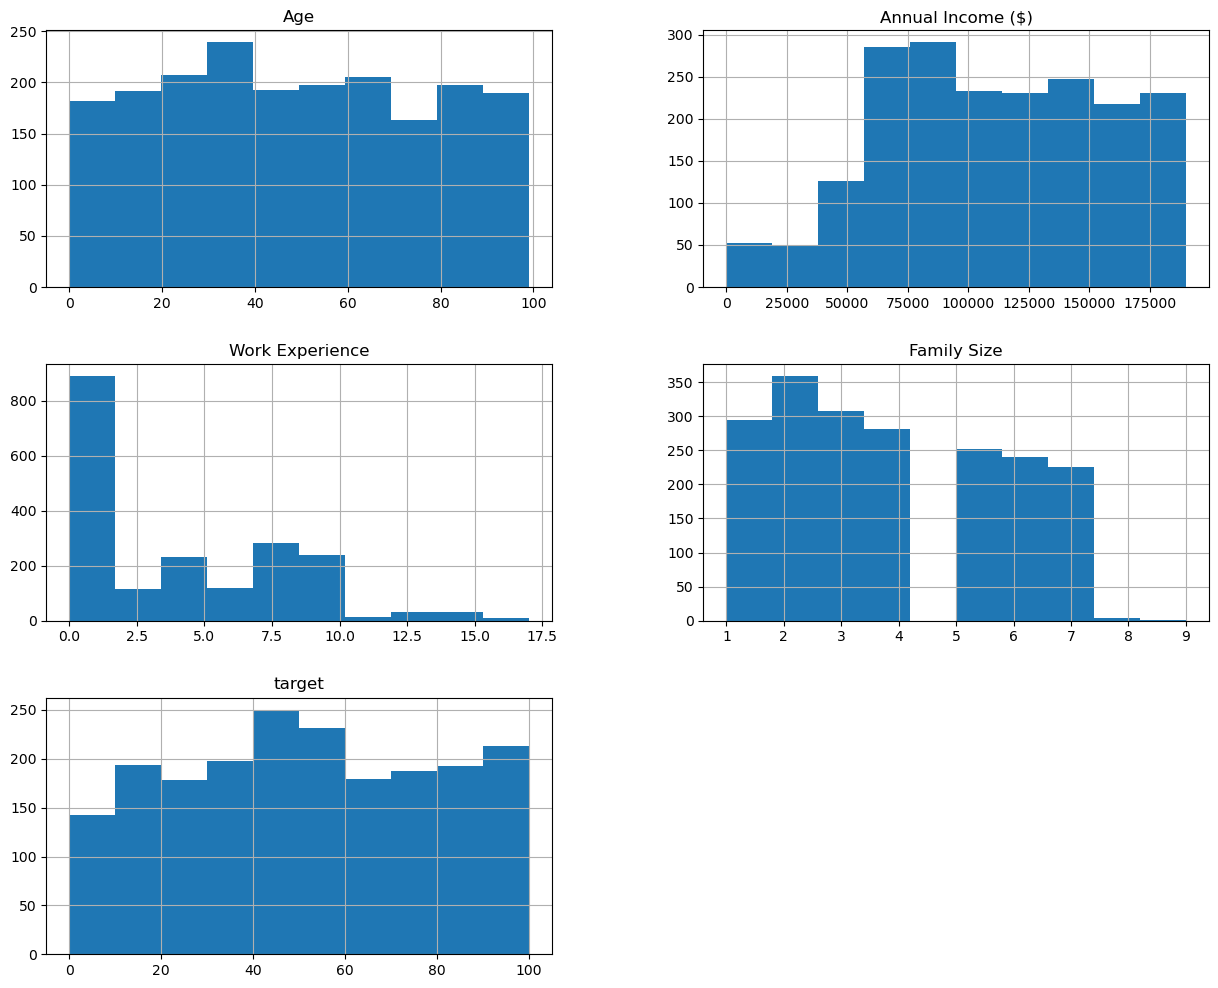

In [11]:
pre_c_df.hist(figsize=(15,12))

target 모양 변경 작업

In [12]:
from sklearn.preprocessing import StandardScaler

std_c_df = pre_c_df.copy()
scaler = StandardScaler()
target = scaler.fit_transform(pre_c_df[['target']])
std_c_df['target'] = target
std_c_df

Age  Annual Income ($)  Work Experience  Family Size    target
0      19              15000                1            4 -0.431850
1      21              35000                3            3  1.069755
2      20              86000                1            1 -1.611684
3      23              59000                0            2  0.926745
4      31              38000                2            6 -0.396098
...   ...                ...              ...          ...       ...
1960   71             184387                8            7 -0.396098
1961   91              73158                7            7 -0.682118
1962   87              90961                9            2 -1.325663
1963   77             182109                7            2 -1.683189
1964   90             110610                5            2  0.032932

[1965 rows x 5 columns]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

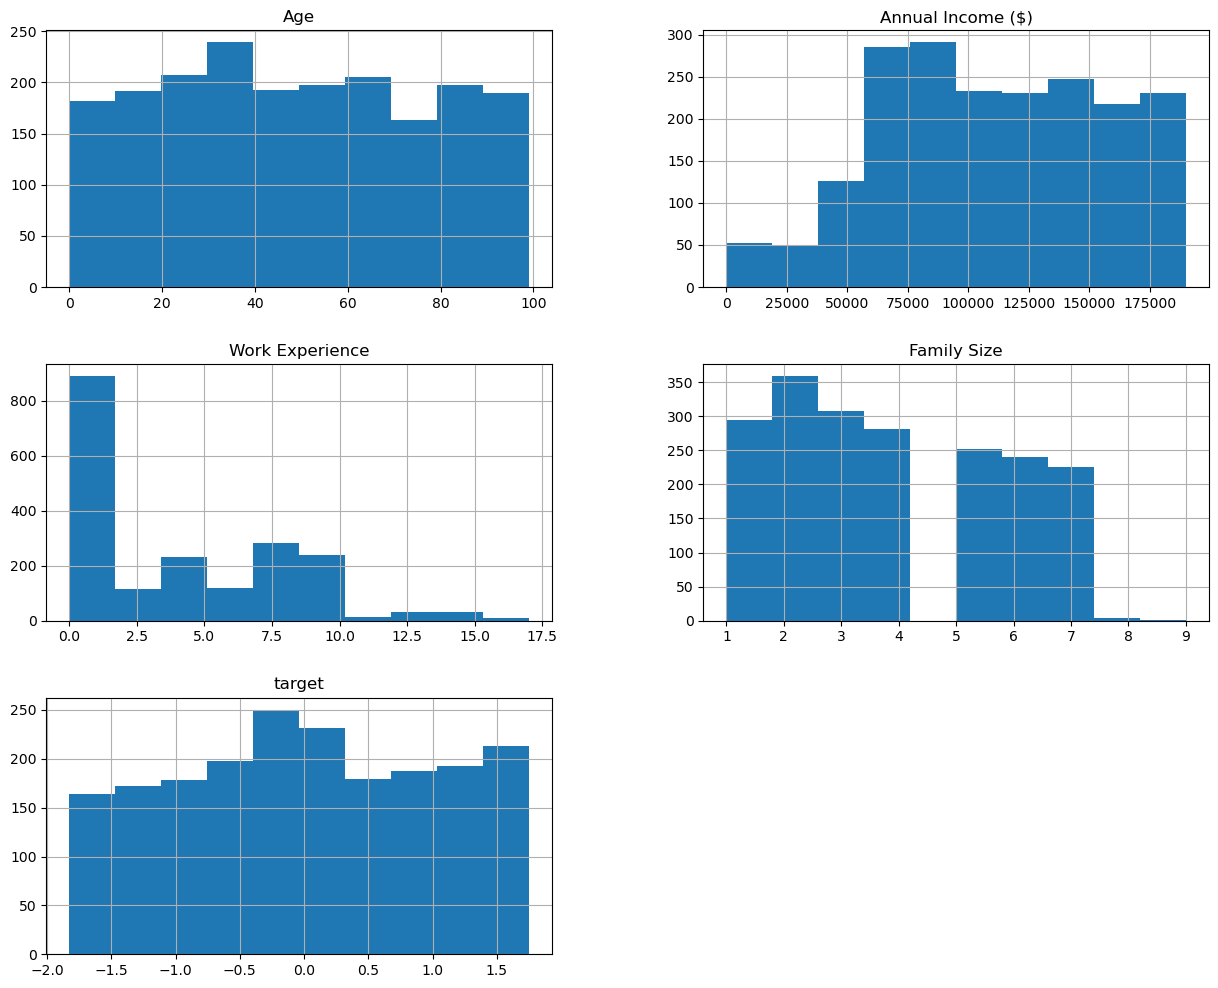

In [13]:
std_c_df.hist(figsize=(15,12))

In [14]:
std_c_df[std_c_df['target'].between(-1.96, 1.96)]

Age  Annual Income ($)  Work Experience  Family Size    target
0      19              15000                1            4 -0.431850
1      21              35000                3            3  1.069755
2      20              86000                1            1 -1.611684
3      23              59000                0            2  0.926745
4      31              38000                2            6 -0.396098
...   ...                ...              ...          ...       ...
1960   71             184387                8            7 -0.396098
1961   91              73158                7            7 -0.682118
1962   87              90961                9            2 -1.325663
1963   77             182109                7            2 -1.683189
1964   90             110610                5            2  0.032932

[1965 rows x 5 columns]

표준화 이상치 없음

상관관계 확인

In [15]:
pre_c_df.corr()['target'].sort_values(ascending=False)[1:]

Annual Income ($)    0.026716
Family Size          0.005859
Work Experience     -0.025587
Age                 -0.037387
Name: target, dtype: float64

<Axes: >

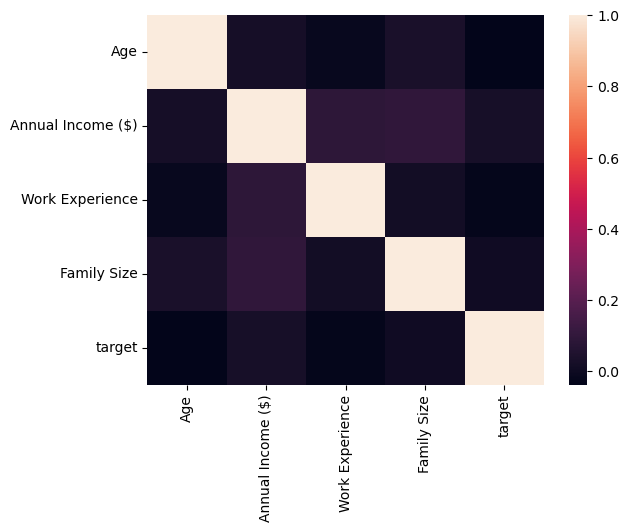

In [16]:
import seaborn as sns

sns.heatmap(pre_c_df.corr())

In [17]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [18]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              1200.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:55:29   Log-Likelihood:                         -9558.9
No. Observations:                1965   AIC:                                  1.913e+04
Df Residuals:                    1961   BIC:                                  1.915e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [20]:
get_vif(features)

vif_score            feature
0   3.158919                Age
1   4.519000  Annual Income ($)
2   1.984835    Work Experience
3   3.733422        Family Size

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

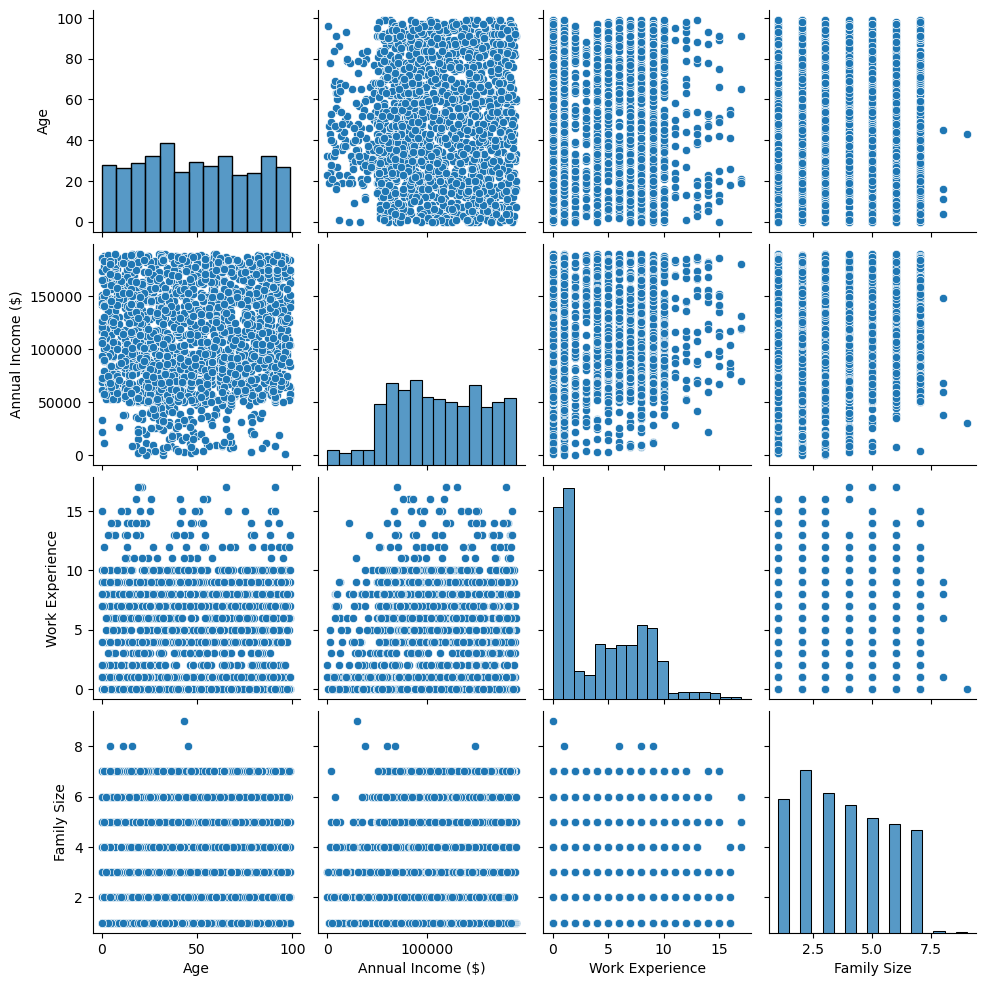

In [21]:
import matplotlib.pyplot as plt

sns.pairplot(features)
plt.show()

다중 공산성 확인 결과 아무런 feature도 없음을 확인

one_hot_encoding 진행 후 다시 확인

In [22]:
c_df

Gender  Age  Annual Income ($)     Profession  Work Experience  \
0       Male   19              15000     Healthcare                1   
1       Male   21              35000       Engineer                3   
2     Female   20              86000       Engineer                1   
3     Female   23              59000         Lawyer                0   
4     Female   31              38000  Entertainment                2   
...      ...  ...                ...            ...              ...   
1960  Female   71             184387         Artist                8   
1961  Female   91              73158         Doctor                7   
1962    Male   87              90961     Healthcare                9   
1963    Male   77             182109      Executive                7   
1964    Male   90             110610  Entertainment                5   

      Family Size  target  
0               4      39  
1               3      81  
2               1       6  
3               2      77  
4               6      40  
...           ...     ...  
1960            7      40  
1961            7      32  
1962            2      14  
1963            2       4  
1964            2      52  

[1965 rows x 7 columns]

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

pre_c_df = c_df.copy()
encoder =  OneHotEncoder(sparse_output=False)

target = encoder.fit_transform(pre_c_df[['Profession']])

pre_c_df = pd.concat([pre_c_df, pd.DataFrame(target, columns=encoder.categories_).astype(np.int8)], axis=1)
pre_c_df

Gender  Age  Annual Income ($)     Profession  Work Experience  \
0       Male   19              15000     Healthcare                1   
1       Male   21              35000       Engineer                3   
2     Female   20              86000       Engineer                1   
3     Female   23              59000         Lawyer                0   
4     Female   31              38000  Entertainment                2   
...      ...  ...                ...            ...              ...   
1960  Female   71             184387         Artist                8   
1961  Female   91              73158         Doctor                7   
1962    Male   87              90961     Healthcare                9   
1963    Male   77             182109      Executive                7   
1964    Male   90             110610  Entertainment                5   

      Family Size  target  (Artist,)  (Doctor,)  (Engineer,)  \
0               4      39          0          0            0   
1               3      81          0          0            1   
2               1       6          0          0            1   
3               2      77          0          0            0   
4               6      40          0          0            0   
...           ...     ...        ...        ...          ...   
1960            7      40          1          0            0   
1961            7      32          0          1            0   
1962            2      14          0          0            0   
1963            2       4          0          0            0   
1964            2      52          0          0            0   

      (Entertainment,)  (Executive,)  (Healthcare,)  (Homemaker,)  (Lawyer,)  \
0                    0             0              1             0          0   
1                    0             0              0             0          0   
2                    0             0              0             0          0   
3                    0             0              0             0          1   
4                    1             0              0             0          0   
...                ...           ...            ...           ...        ...   
1960                 0             0              0             0          0   
1961                 0             0              0             0          0   
1962                 0             0              1             0          0   
1963                 0             1              0             0          0   
1964                 1             0              0             0          0   

      (Marketing,)  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
1960             0  
1961             0  
1962             0  
1963             0  
1964             0  

[1965 rows x 16 columns]

In [24]:
pre_c_df=pre_c_df.drop(labels=['Profession'], axis=1)
pre_c_df

Gender  Age  Annual Income ($)  Work Experience  Family Size  target  \
0       Male   19              15000                1            4      39   
1       Male   21              35000                3            3      81   
2     Female   20              86000                1            1       6   
3     Female   23              59000                0            2      77   
4     Female   31              38000                2            6      40   
...      ...  ...                ...              ...          ...     ...   
1960  Female   71             184387                8            7      40   
1961  Female   91              73158                7            7      32   
1962    Male   87              90961                9            2      14   
1963    Male   77             182109                7            2       4   
1964    Male   90             110610                5            2      52   

      (Artist,)  (Doctor,)  (Engineer,)  (Entertainment,)  (Executive,)  \
0             0          0            0                 0             0   
1             0          0            1                 0             0   
2             0          0            1                 0             0   
3             0          0            0                 0             0   
4             0          0            0                 1             0   
...         ...        ...          ...               ...           ...   
1960          1          0            0                 0             0   
1961          0          1            0                 0             0   
1962          0          0            0                 0             0   
1963          0          0            0                 0             1   
1964          0          0            0                 1             0   

      (Healthcare,)  (Homemaker,)  (Lawyer,)  (Marketing,)  
0                 1             0          0             0  
1                 0             0          0             0  
2                 0             0          0             0  
3                 0             0          1             0  
4                 0             0          0             0  
...             ...           ...        ...           ...  
1960              0             0          0             0  
1961              0             0          0             0  
1962              1             0          0             0  
1963              0             0          0             0  
1964              0             0          0             0  

[1965 rows x 15 columns]

In [25]:
pre_c_df.columns = ['Gender','Age', 'Annual Income','Work Experience','Family Size','target','Artist',
                  'Doctor','Engineer','Entertainment','Executive','Healthcare','Homemaker',
                  'Lawyer','Marketing']

In [26]:
pre_c_df

Gender  Age  Annual Income  Work Experience  Family Size  target  \
0       Male   19          15000                1            4      39   
1       Male   21          35000                3            3      81   
2     Female   20          86000                1            1       6   
3     Female   23          59000                0            2      77   
4     Female   31          38000                2            6      40   
...      ...  ...            ...              ...          ...     ...   
1960  Female   71         184387                8            7      40   
1961  Female   91          73158                7            7      32   
1962    Male   87          90961                9            2      14   
1963    Male   77         182109                7            2       4   
1964    Male   90         110610                5            2      52   

      Artist  Doctor  Engineer  Entertainment  Executive  Healthcare  \
0          0       0         0              0          0           1   
1          0       0         1              0          0           0   
2          0       0         1              0          0           0   
3          0       0         0              0          0           0   
4          0       0         0              1          0           0   
...      ...     ...       ...            ...        ...         ...   
1960       1       0         0              0          0           0   
1961       0       1         0              0          0           0   
1962       0       0         0              0          0           1   
1963       0       0         0              0          1           0   
1964       0       0         0              1          0           0   

      Homemaker  Lawyer  Marketing  
0             0       0          0  
1             0       0          0  
2             0       0          0  
3             0       1          0  
4             0       0          0  
...         ...     ...        ...  
1960          0       0          0  
1961          0       0          0  
1962          0       0          0  
1963          0       0          0  
1964          0       0          0  

[1965 rows x 15 columns]

상관관계 다시 확인

In [27]:
pre_c_df['targets'] = pre_c_df['target']
pre_c_df = pre_c_df.drop(labels=['target'], axis=1)
pre_c_df

Gender  Age  Annual Income  Work Experience  Family Size  Artist  \
0       Male   19          15000                1            4       0   
1       Male   21          35000                3            3       0   
2     Female   20          86000                1            1       0   
3     Female   23          59000                0            2       0   
4     Female   31          38000                2            6       0   
...      ...  ...            ...              ...          ...     ...   
1960  Female   71         184387                8            7       1   
1961  Female   91          73158                7            7       0   
1962    Male   87          90961                9            2       0   
1963    Male   77         182109                7            2       0   
1964    Male   90         110610                5            2       0   

      Doctor  Engineer  Entertainment  Executive  Healthcare  Homemaker  \
0          0         0              0          0           1          0   
1          0         1              0          0           0          0   
2          0         1              0          0           0          0   
3          0         0              0          0           0          0   
4          0         0              1          0           0          0   
...      ...       ...            ...        ...         ...        ...   
1960       0         0              0          0           0          0   
1961       1         0              0          0           0          0   
1962       0         0              0          0           1          0   
1963       0         0              0          1           0          0   
1964       0         0              1          0           0          0   

      Lawyer  Marketing  targets  
0          0          0       39  
1          0          0       81  
2          0          0        6  
3          1          0       77  
4          0          0       40  
...      ...        ...      ...  
1960       0          0       40  
1961       0          0       32  
1962       0          0       14  
1963       0          0        4  
1964       0          0       52  

[1965 rows x 15 columns]

In [28]:
pre_c_df.Gender.value_counts()

Gender
Female    1166
Male       799
Name: count, dtype: int64

In [29]:
def translate(x):
    if x == 'Male':
        return 1
    return 0

In [30]:
pre_c_df['Gender'] = pre_c_df.Gender.apply(translate)

In [31]:
pre_c_df

Gender  Age  Annual Income  Work Experience  Family Size  Artist  \
0          1   19          15000                1            4       0   
1          1   21          35000                3            3       0   
2          0   20          86000                1            1       0   
3          0   23          59000                0            2       0   
4          0   31          38000                2            6       0   
...      ...  ...            ...              ...          ...     ...   
1960       0   71         184387                8            7       1   
1961       0   91          73158                7            7       0   
1962       1   87          90961                9            2       0   
1963       1   77         182109                7            2       0   
1964       1   90         110610                5            2       0   

      Doctor  Engineer  Entertainment  Executive  Healthcare  Homemaker  \
0          0         0              0          0           1          0   
1          0         1              0          0           0          0   
2          0         1              0          0           0          0   
3          0         0              0          0           0          0   
4          0         0              1          0           0          0   
...      ...       ...            ...        ...         ...        ...   
1960       0         0              0          0           0          0   
1961       1         0              0          0           0          0   
1962       0         0              0          0           1          0   
1963       0         0              0          1           0          0   
1964       0         0              1          0           0          0   

      Lawyer  Marketing  targets  
0          0          0       39  
1          0          0       81  
2          0          0        6  
3          1          0       77  
4          0          0       40  
...      ...        ...      ...  
1960       0          0       40  
1961       0          0       32  
1962       0          0       14  
1963       0          0        4  
1964       0          0       52  

[1965 rows x 15 columns]

In [32]:
pre_c_df.corr()['targets'].sort_values(ascending=False)[1:]

Artist             0.038454
Annual Income      0.026716
Entertainment      0.024467
Doctor             0.008777
Family Size        0.005859
Gender             0.003703
Healthcare        -0.009185
Executive         -0.012227
Marketing         -0.017950
Lawyer            -0.022149
Engineer          -0.023909
Work Experience   -0.025587
Homemaker         -0.029793
Age               -0.037387
Name: targets, dtype: float64

In [33]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [34]:
model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                targets   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.055
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.395
Time:                        15:55:30   Log-Likelihood:                -9327.0
No. Observations:                1965   AIC:                         1.868e+04
Df Residuals:                    1951   BIC:                         1.876e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender              0.2331      1.287     

In [35]:
get_vif(features)

vif_score          feature
0    1.003391           Gender
1    1.009479              Age
2    1.018419    Annual Income
3    1.022377  Work Experience
4    1.015232      Family Size
5    4.850544           Artist
6    2.036764           Doctor
7    2.207687         Engineer
8    2.557078    Entertainment
9    2.034524        Executive
10   3.253193       Healthcare
11   1.417323        Homemaker
12   1.877561           Lawyer
13   1.523156        Marketing

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

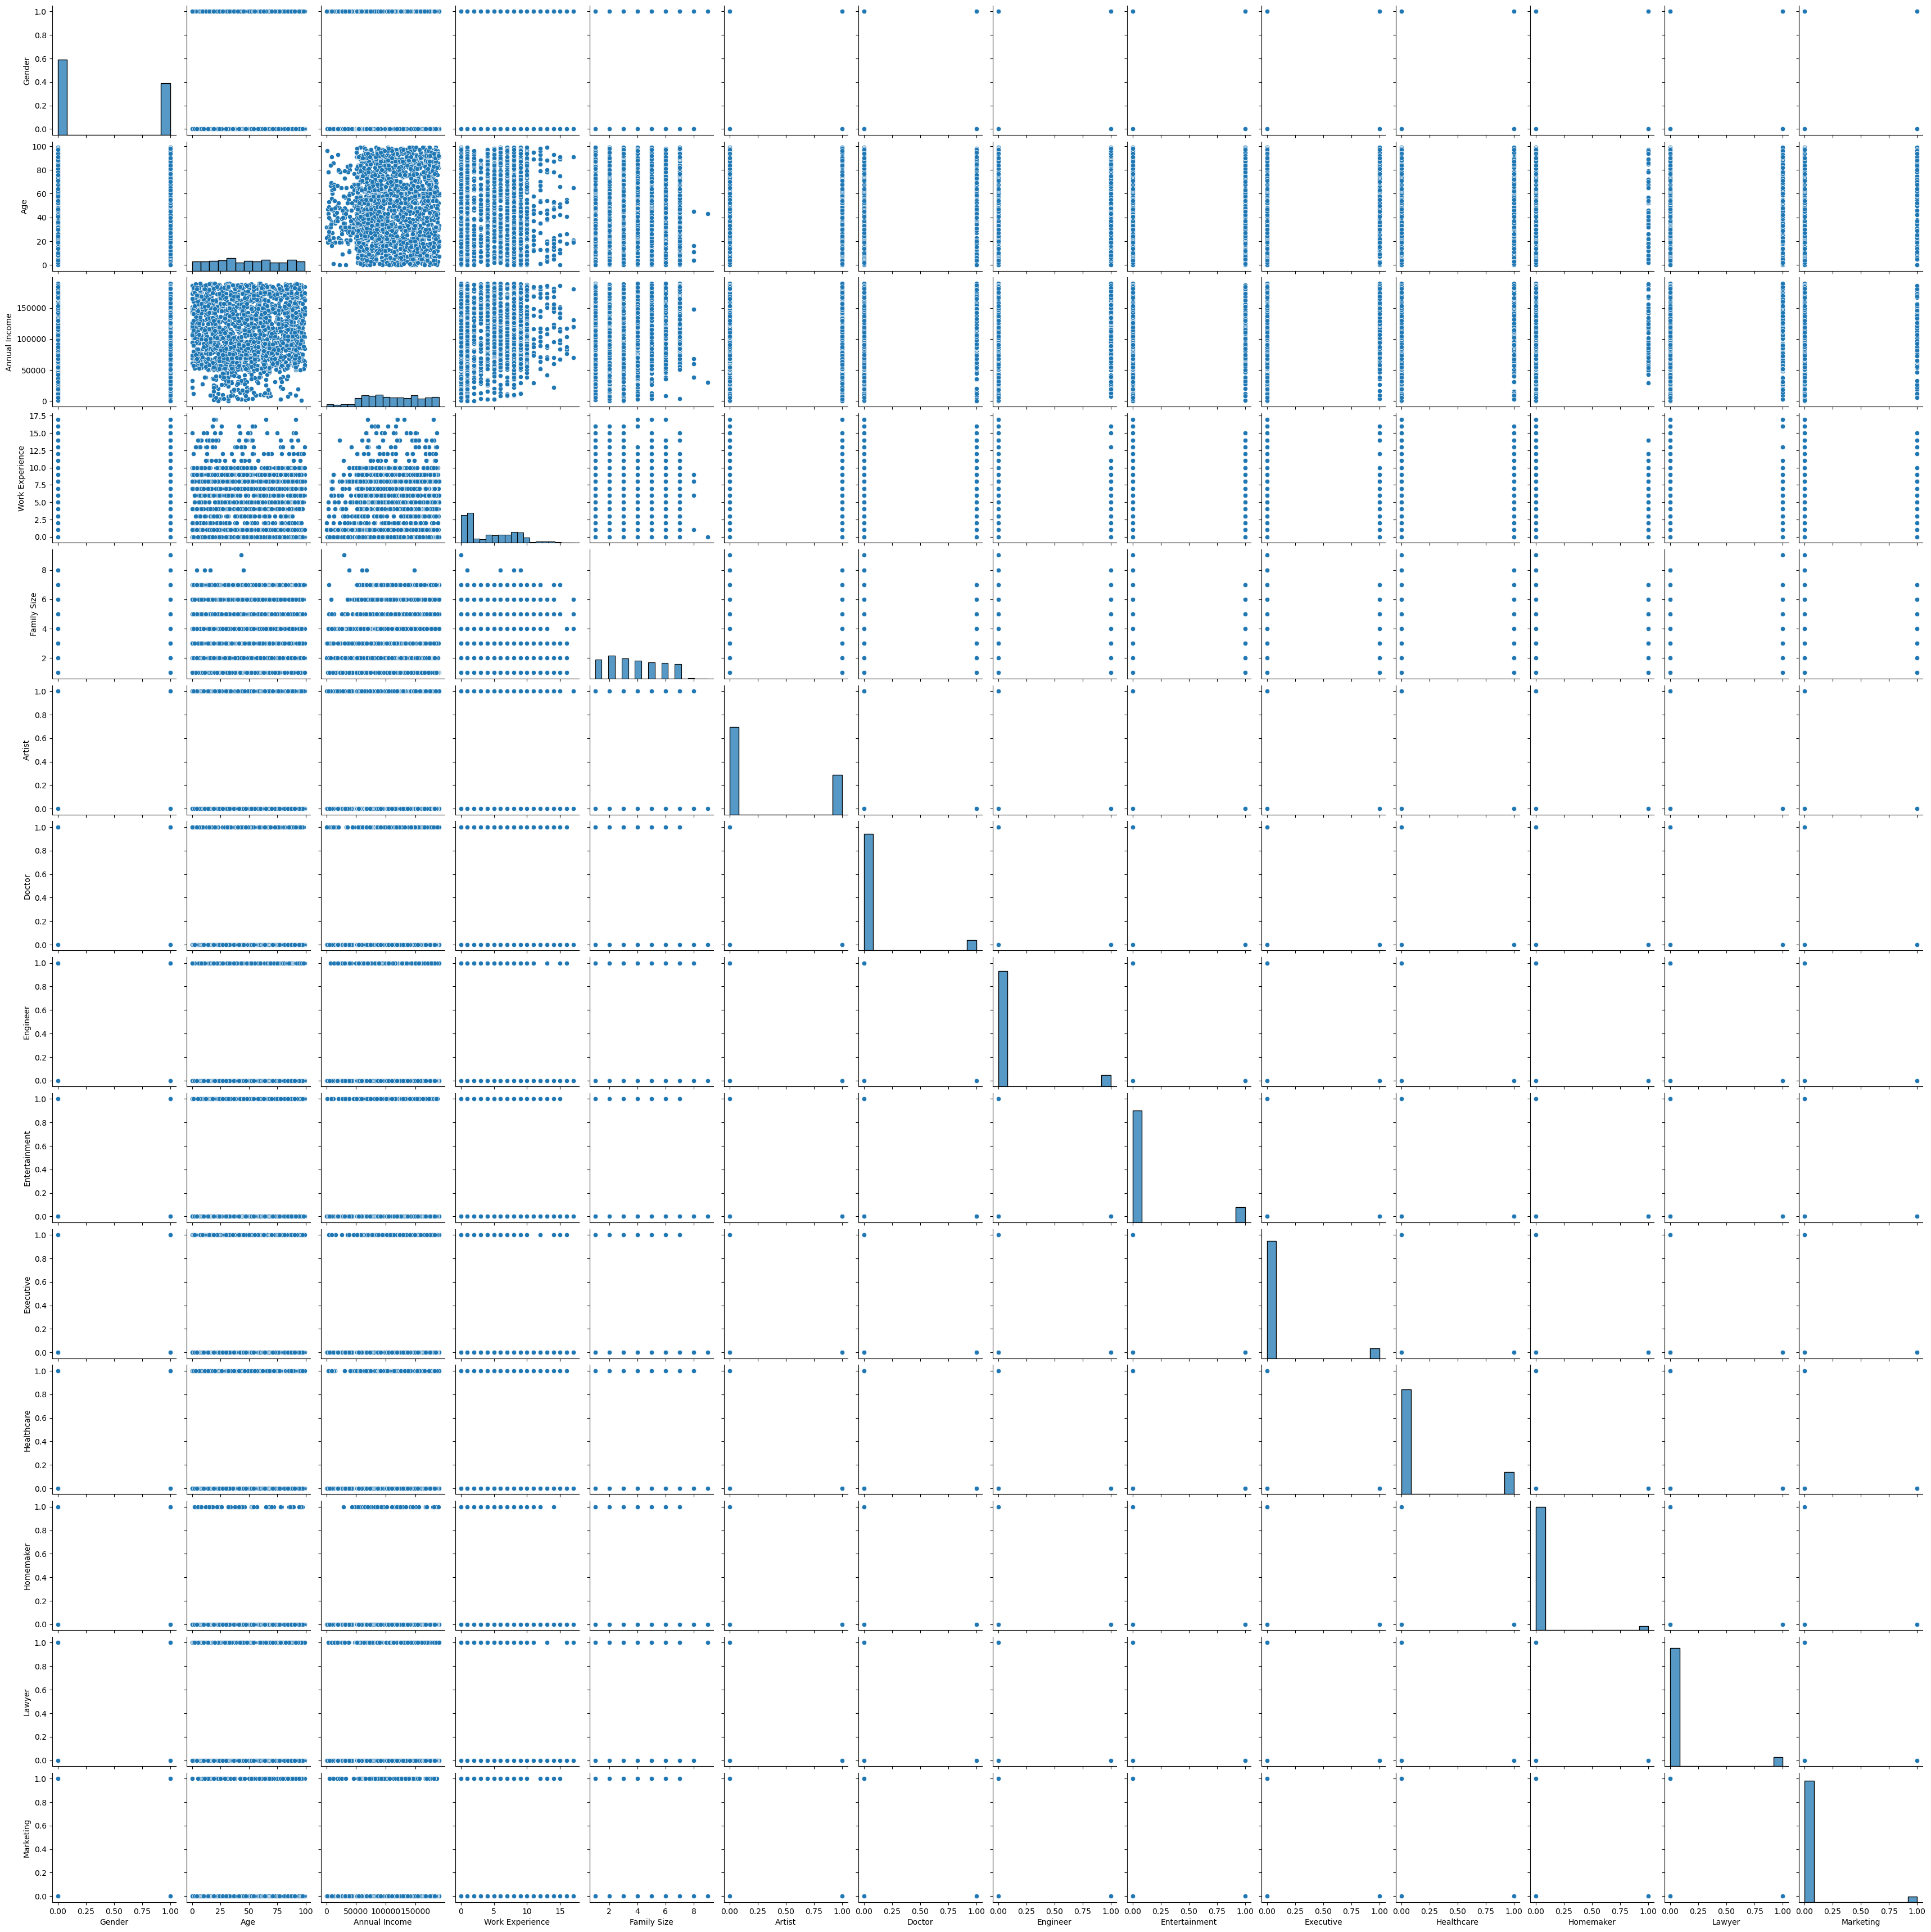

In [36]:
sns.pairplot(features)
plt.show()

Gender, Family Size 제거

In [37]:
pre_c_df = pre_c_df.drop(labels=['Gender', 'Family Size'], axis=1)
pre_c_df

Age  Annual Income  Work Experience  Artist  Doctor  Engineer  \
0      19          15000                1       0       0         0   
1      21          35000                3       0       0         1   
2      20          86000                1       0       0         1   
3      23          59000                0       0       0         0   
4      31          38000                2       0       0         0   
...   ...            ...              ...     ...     ...       ...   
1960   71         184387                8       1       0         0   
1961   91          73158                7       0       1         0   
1962   87          90961                9       0       0         0   
1963   77         182109                7       0       0         0   
1964   90         110610                5       0       0         0   

      Entertainment  Executive  Healthcare  Homemaker  Lawyer  Marketing  \
0                 0          0           1          0       0          0   
1                 0          0           0          0       0          0   
2                 0          0           0          0       0          0   
3                 0          0           0          0       1          0   
4                 1          0           0          0       0          0   
...             ...        ...         ...        ...     ...        ...   
1960              0          0           0          0       0          0   
1961              0          0           0          0       0          0   
1962              0          0           1          0       0          0   
1963              0          1           0          0       0          0   
1964              1          0           0          0       0          0   

      targets  
0          39  
1          81  
2           6  
3          77  
4          40  
...       ...  
1960       40  
1961       32  
1962       14  
1963        4  
1964       52  

[1965 rows x 13 columns]

In [38]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [39]:
model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                targets   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.239
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.255
Time:                        15:55:46   Log-Likelihood:                -9327.1
No. Observations:                1965   AIC:                         1.868e+04
Df Residuals:                    1953   BIC:                         1.875e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0387      0.022     

In [40]:
get_vif(features)

vif_score          feature
0    1.008195              Age
1    1.009940    Annual Income
2    1.021943  Work Experience
3    3.888845           Artist
4    1.763482           Doctor
5    1.926689         Engineer
6    2.122964    Entertainment
7    1.740863        Executive
8    2.626061       Healthcare
9    1.304837        Homemaker
10   1.655021           Lawyer
11   1.383794        Marketing

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Artist'}>],
       [<Axes: title={'center': 'Doctor'}>,
        <Axes: title={'center': 'Engineer'}>,
        <Axes: title={'center': 'Entertainment'}>,
        <Axes: title={'center': 'Executive'}>],
       [<Axes: title={'center': 'Healthcare'}>,
        <Axes: title={'center': 'Homemaker'}>,
        <Axes: title={'center': 'Lawyer'}>,
        <Axes: title={'center': 'Marketing'}>],
       [<Axes: title={'center': 'targets'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

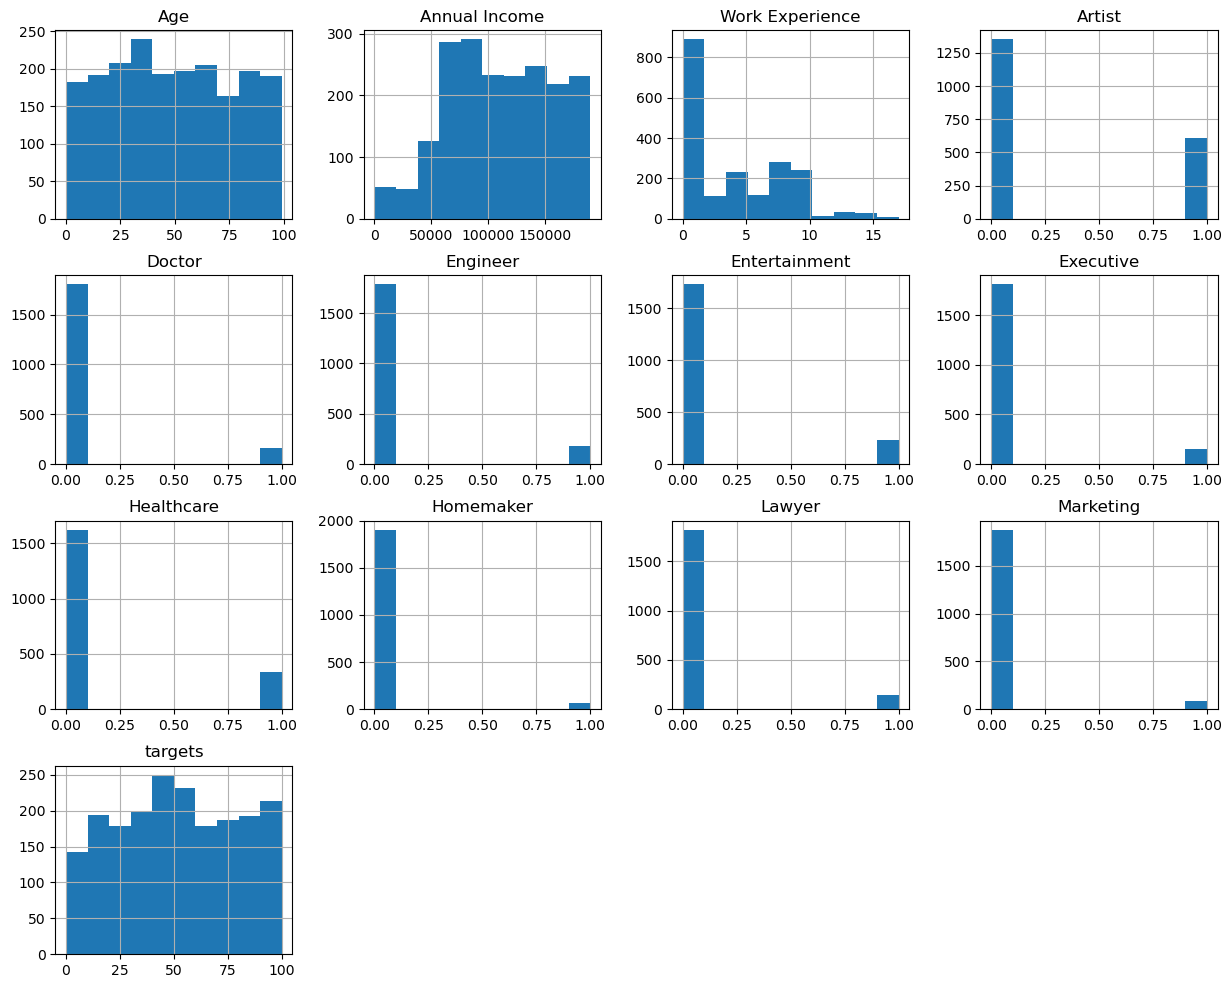

In [41]:
pre_c_df.hist(figsize= (15, 12))

In [46]:
from torch.nn import Linear, Module

class LRM(Module):
    def __init__(self, input):
        super().__init__()
        self.linear = Linear(input, 1)

    def forward(self, x):
        return self.linear(x)

In [81]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LRM(12)

optimizer = SGD(l_r.parameters(), lr=3e-12)

epochs = 10000

for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        # print(
        #     '{:4d}/{}: '.format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end=''
        # )
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print(
                'W{}: {:.4f}, '.format(i + 1, w.item()), end=''
            )
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

W1: -0.2006, W2: 0.0005, W3: 0.1967, W4: -0.0149, W5: 0.0071, W6: -0.2176, W7: -0.1098, W8: -0.0193, W9: -0.0088, W10: -0.1607, W11: -0.2071, W12: -0.0306, b: 0.2877, loss: 1319.2540
W1: -0.2006, W2: 0.0005, W3: 0.1967, W4: -0.0149, W5: 0.0071, W6: -0.2176, W7: -0.1098, W8: -0.0193, W9: -0.0088, W10: -0.1607, W11: -0.2071, W12: -0.0306, b: 0.2877, loss: 1317.6792
W1: -0.2006, W2: 0.0005, W3: 0.1967, W4: -0.0149, W5: 0.0071, W6: -0.2176, W7: -0.1098, W8: -0.0193, W9: -0.0088, W10: -0.1607, W11: -0.2071, W12: -0.0306, b: 0.2877, loss: 1317.6794
W1: -0.2006, W2: 0.0005, W3: 0.1967, W4: -0.0149, W5: 0.0071, W6: -0.2176, W7: -0.1098, W8: -0.0193, W9: -0.0088, W10: -0.1607, W11: -0.2071, W12: -0.0306, b: 0.2877, loss: 1317.6794
W1: -0.2006, W2: 0.0005, W3: 0.1967, W4: -0.0149, W5: 0.0071, W6: -0.2176, W7: -0.1098, W8: -0.0193, W9: -0.0088, W10: -0.1607, W11: -0.2071, W12: -0.0306, b: 0.2877, loss: 1317.6794
W1: -0.2006, W2: 0.0005, W3: 0.1967, W4: -0.0149, W5: 0.0071, W6: -0.2176, W7: -0.109

In [82]:
import numpy as np

H = l_r(X_test)
loss = mse_loss(y_test, H)

print(loss.item())
print(np.sqrt(loss.item()))

1208.1922607421875
34.75906012455152


In [83]:
y_test = y_test.detach().numpy()
H = l_r(X_test)
prediction = H.detach().numpy()

In [84]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
           .format(MSE, RMSE, MSLE, RMSLE))

In [130]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation1(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    #MSLE = mean_squared_log_error(y_test, prediction)
    #RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}'\
           .format(MSE, RMSE))

In [131]:
get_evaluation1(y_test, prediction)

MSE: 1399.8359, RMSE: 37.4144


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [88]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()))
print('b: {:.4f}, MSLE: {:.4f}, MSE: {:.4f}'\
      .format(l_r.intercept_, mean_squared_log_error(y_test, prediction), mean_squared_error(y_test, prediction)))

W1: -0.0393, 
W2: 0.0000, 
W3: -0.1718, 
W4: 2.7898, 
W5: 1.0050, 
W6: -1.8949, 
W7: 1.8967, 
W8: 0.2479, 
W9: 0.2365, 
W10: -2.7294, 
W11: -2.2976, 
W12: 0.7460, 
b: 52.0031, MSLE: 0.8243, MSE: 786.6346


In [89]:
get_evaluation(y_test, prediction)

MSE: 786.6346, RMSE: 28.0470, MSLE: 0.8243, RMSLE: 0.9079


In [91]:
pre_c_df

Age  Annual Income  Work Experience  Artist  Doctor  Engineer  \
0      19          15000                1       0       0         0   
1      21          35000                3       0       0         1   
2      20          86000                1       0       0         1   
3      23          59000                0       0       0         0   
4      31          38000                2       0       0         0   
...   ...            ...              ...     ...     ...       ...   
1960   71         184387                8       1       0         0   
1961   91          73158                7       0       1         0   
1962   87          90961                9       0       0         0   
1963   77         182109                7       0       0         0   
1964   90         110610                5       0       0         0   

      Entertainment  Executive  Healthcare  Homemaker  Lawyer  Marketing  \
0                 0          0           1          0       0          0   
1                 0          0           0          0       0          0   
2                 0          0           0          0       0          0   
3                 0          0           0          0       1          0   
4                 1          0           0          0       0          0   
...             ...        ...         ...        ...     ...        ...   
1960              0          0           0          0       0          0   
1961              0          0           0          0       0          0   
1962              0          0           1          0       0          0   
1963              0          1           0          0       0          0   
1964              1          0           0          0       0          0   

      targets  
0          39  
1          81  
2           6  
3          77  
4          40  
...       ...  
1960       40  
1961       32  
1962       14  
1963        4  
1964       52  

[1965 rows x 13 columns]

In [92]:
model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                targets   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.239
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.255
Time:                        16:06:22   Log-Likelihood:                -9327.1
No. Observations:                1965   AIC:                         1.868e+04
Df Residuals:                    1953   BIC:                         1.875e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0387      0.022     

In [93]:
pre_c_df['Artist'] = pre_c_df['Artist'] * 53.3415
pre_c_df['Doctor'] = pre_c_df['Doctor'] * 52.4362
pre_c_df['Engineer'] = pre_c_df['Engineer'] * 49.7713
pre_c_df['Entertainment'] = pre_c_df['Entertainment'] * 53.5154
pre_c_df['Executive'] = pre_c_df['Executive'] * 50.3849
pre_c_df['Healthcare'] = pre_c_df['Healthcare'] * 51.0229
pre_c_df['Homemaker'] = pre_c_df['Homemaker'] * 47.2723
pre_c_df['Lawyer'] = pre_c_df['Lawyer'] * 49.3013
pre_c_df['Marketing'] = pre_c_df['Marketing'] * 49.2897

In [94]:
pre_c_df

Age  Annual Income  Work Experience   Artist   Doctor  Engineer  \
0      19          15000                1   0.0000   0.0000    0.0000   
1      21          35000                3   0.0000   0.0000   49.7713   
2      20          86000                1   0.0000   0.0000   49.7713   
3      23          59000                0   0.0000   0.0000    0.0000   
4      31          38000                2   0.0000   0.0000    0.0000   
...   ...            ...              ...      ...      ...       ...   
1960   71         184387                8  53.3415   0.0000    0.0000   
1961   91          73158                7   0.0000  52.4362    0.0000   
1962   87          90961                9   0.0000   0.0000    0.0000   
1963   77         182109                7   0.0000   0.0000    0.0000   
1964   90         110610                5   0.0000   0.0000    0.0000   

      Entertainment  Executive  Healthcare  Homemaker   Lawyer  Marketing  \
0            0.0000     0.0000     51.0229        0.0   0.0000        0.0   
1            0.0000     0.0000      0.0000        0.0   0.0000        0.0   
2            0.0000     0.0000      0.0000        0.0   0.0000        0.0   
3            0.0000     0.0000      0.0000        0.0  49.3013        0.0   
4           53.5154     0.0000      0.0000        0.0   0.0000        0.0   
...             ...        ...         ...        ...      ...        ...   
1960         0.0000     0.0000      0.0000        0.0   0.0000        0.0   
1961         0.0000     0.0000      0.0000        0.0   0.0000        0.0   
1962         0.0000     0.0000     51.0229        0.0   0.0000        0.0   
1963         0.0000    50.3849      0.0000        0.0   0.0000        0.0   
1964        53.5154     0.0000      0.0000        0.0   0.0000        0.0   

      targets  
0          39  
1          81  
2           6  
3          77  
4          40  
...       ...  
1960       40  
1961       32  
1962       14  
1963        4  
1964       52  

[1965 rows x 13 columns]

In [95]:
pre_c_df['job_score'] = pre_c_df['Artist'] + pre_c_df['Doctor'] + pre_c_df['Engineer'] + pre_c_df['Entertainment'] + \
pre_c_df['Executive'] + pre_c_df['Healthcare'] + pre_c_df['Homemaker'] + pre_c_df['Lawyer'] + pre_c_df['Marketing']

In [96]:
pre_c_df

Age  Annual Income  Work Experience   Artist   Doctor  Engineer  \
0      19          15000                1   0.0000   0.0000    0.0000   
1      21          35000                3   0.0000   0.0000   49.7713   
2      20          86000                1   0.0000   0.0000   49.7713   
3      23          59000                0   0.0000   0.0000    0.0000   
4      31          38000                2   0.0000   0.0000    0.0000   
...   ...            ...              ...      ...      ...       ...   
1960   71         184387                8  53.3415   0.0000    0.0000   
1961   91          73158                7   0.0000  52.4362    0.0000   
1962   87          90961                9   0.0000   0.0000    0.0000   
1963   77         182109                7   0.0000   0.0000    0.0000   
1964   90         110610                5   0.0000   0.0000    0.0000   

      Entertainment  Executive  Healthcare  Homemaker   Lawyer  Marketing  \
0            0.0000     0.0000     51.0229        0.0   0.0000        0.0   
1            0.0000     0.0000      0.0000        0.0   0.0000        0.0   
2            0.0000     0.0000      0.0000        0.0   0.0000        0.0   
3            0.0000     0.0000      0.0000        0.0  49.3013        0.0   
4           53.5154     0.0000      0.0000        0.0   0.0000        0.0   
...             ...        ...         ...        ...      ...        ...   
1960         0.0000     0.0000      0.0000        0.0   0.0000        0.0   
1961         0.0000     0.0000      0.0000        0.0   0.0000        0.0   
1962         0.0000     0.0000     51.0229        0.0   0.0000        0.0   
1963         0.0000    50.3849      0.0000        0.0   0.0000        0.0   
1964        53.5154     0.0000      0.0000        0.0   0.0000        0.0   

      targets  job_score  
0          39    51.0229  
1          81    49.7713  
2           6    49.7713  
3          77    49.3013  
4          40    53.5154  
...       ...        ...  
1960       40    53.3415  
1961       32    52.4362  
1962       14    51.0229  
1963        4    50.3849  
1964       52    53.5154  

[1965 rows x 14 columns]

In [102]:
pre_c_df.iloc[:, 3:-2].columns

Index(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'],
      dtype='object')

In [104]:
for column in pre_c_df.iloc[:, 3:-2].columns:
    #print(column)
    pre_c_df = pre_c_df.drop(labels=[column], axis=1)

In [105]:
pre_c_df

Age  Annual Income  Work Experience  targets  job_score
0      19          15000                1       39    51.0229
1      21          35000                3       81    49.7713
2      20          86000                1        6    49.7713
3      23          59000                0       77    49.3013
4      31          38000                2       40    53.5154
...   ...            ...              ...      ...        ...
1960   71         184387                8       40    53.3415
1961   91          73158                7       32    52.4362
1962   87          90961                9       14    51.0229
1963   77         182109                7        4    50.3849
1964   90         110610                5       52    53.5154

[1965 rows x 5 columns]

In [106]:
pre_c_df['Target'] = pre_c_df['targets']
pre_c_df

Age  Annual Income  Work Experience  targets  job_score  Target
0      19          15000                1       39    51.0229      39
1      21          35000                3       81    49.7713      81
2      20          86000                1        6    49.7713       6
3      23          59000                0       77    49.3013      77
4      31          38000                2       40    53.5154      40
...   ...            ...              ...      ...        ...     ...
1960   71         184387                8       40    53.3415      40
1961   91          73158                7       32    52.4362      32
1962   87          90961                9       14    51.0229      14
1963   77         182109                7        4    50.3849       4
1964   90         110610                5       52    53.5154      52

[1965 rows x 6 columns]

In [107]:
pre_c_df = pre_c_df.drop(labels=['targets'], axis=1)
pre_c_df

Age  Annual Income  Work Experience  job_score  Target
0      19          15000                1    51.0229      39
1      21          35000                3    49.7713      81
2      20          86000                1    49.7713       6
3      23          59000                0    49.3013      77
4      31          38000                2    53.5154      40
...   ...            ...              ...        ...     ...
1960   71         184387                8    53.3415      40
1961   91          73158                7    52.4362      32
1962   87          90961                9    51.0229      14
1963   77         182109                7    50.3849       4
1964   90         110610                5    53.5154      52

[1965 rows x 5 columns]

In [109]:
pre_c_df.corr()['Target'].sort_values(ascending=False)[1:]

job_score          0.062861
Annual Income      0.026716
Work Experience   -0.025587
Age               -0.037387
Name: Target, dtype: float64

In [110]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [112]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              1650.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:14:36   Log-Likelihood:                         -9327.1
No. Observations:                1965   AIC:                                  1.866e+04
Df Residuals:                    1961   BIC:                                  1.868e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [113]:
get_vif(features)

vif_score          feature
0   3.958645              Age
1   6.830789    Annual Income
2   2.097910  Work Experience
3  10.233399        job_score

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

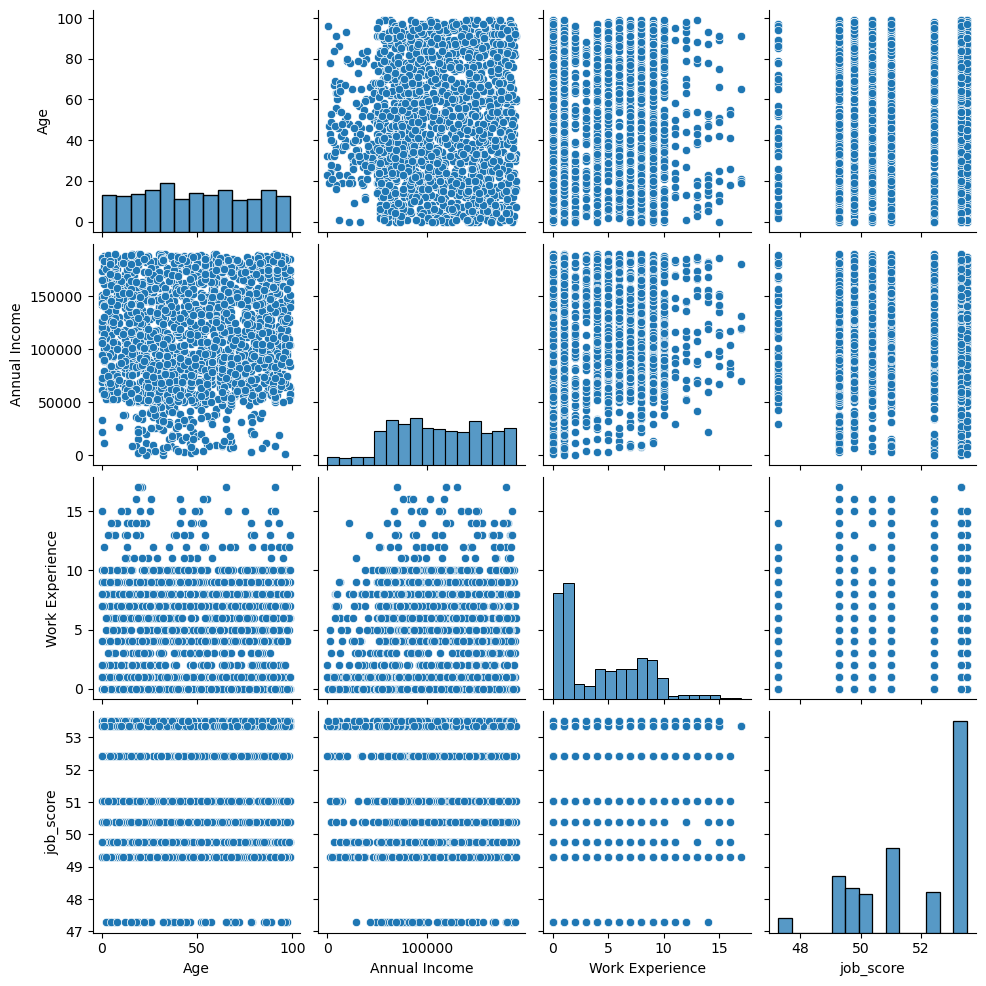

In [115]:
sns.pairplot(features)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'job_score'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

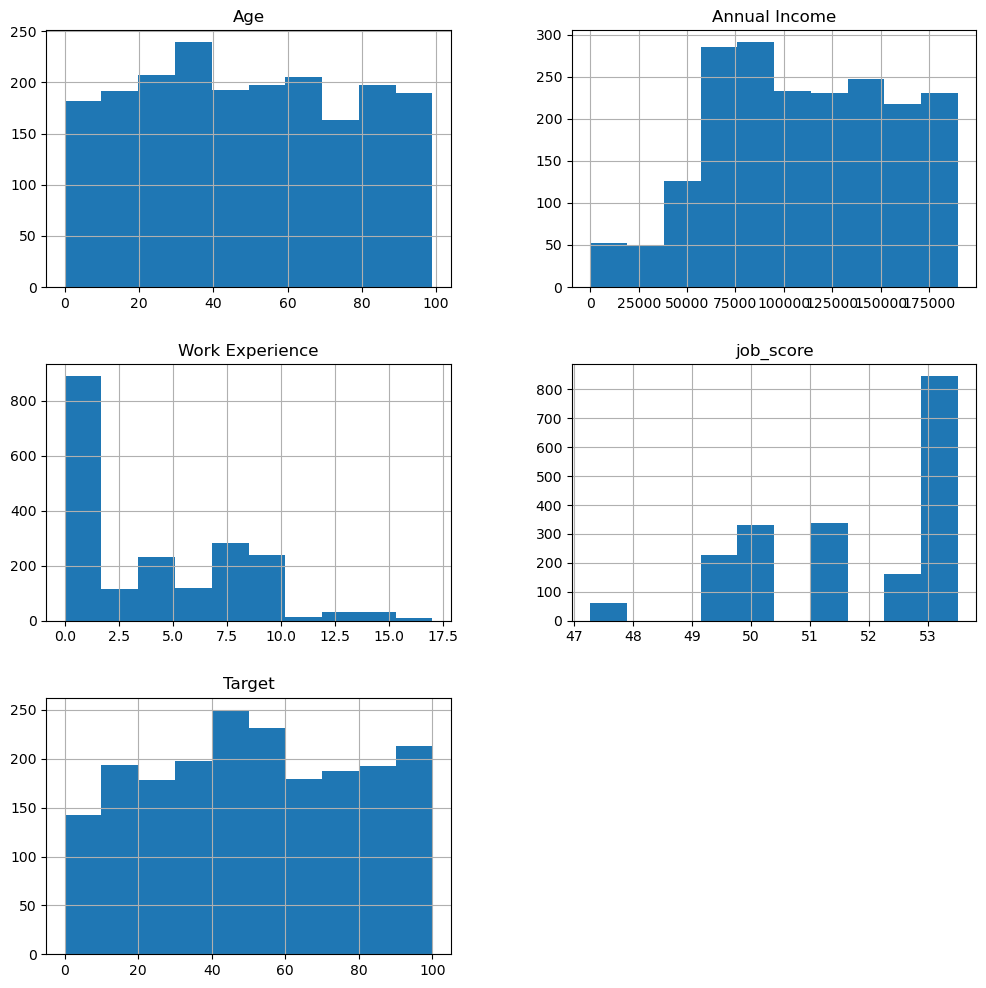

In [116]:
pre_c_df.hist(figsize=(12,12))

데이터엔지니어링을 한 값을 바탕으로 다시 훈련 진행

In [127]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LRM(4)

optimizer = SGD(l_r.parameters(), lr=5e-13)

epochs = 1000000

for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        # print(
        #     '{:4d}/{}: '.format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end=''
        # )
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print(
                'W{}: {:.4f}, '.format(i + 1, w.item()), end=''
            )
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

W1: -0.3474, W2: 0.0315, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 14096034.0000
W1: -0.3474, W2: 0.0079, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 793035.0625
W1: -0.3474, W2: 0.0023, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 45974.8203
W1: -0.3474, W2: 0.0009, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 4021.9834
W1: -0.3474, W2: 0.0006, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1666.0229
W1: -0.3474, W2: 0.0006, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1533.7186
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1526.2887
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1525.8717
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1525.8481
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1525.8468
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1525.8466
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 1525.8467
W1: -0.3474, W2: 0.0005, W3: 0.3407, W4: -0.0259, b: 0.0123, loss: 15

In [128]:
y_test = y_test.detach().numpy()
H = l_r(X_test)
prediction = H.detach().numpy()

In [132]:
get_evaluation1(y_test, prediction)

MSE: 1399.8359, RMSE: 37.4144


In [133]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True)

l_r = Linear(4, 1)

optimizer = SGD(l_r.parameters(), lr=5e-11)

epochs = 100000

for epoch in range(1, epochs+ 1):
    for i, samples in enumerate(dl):

        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(y_train, H)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end= '')
            print(f' b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f' loss: {np.round(loss.item(), 4)}')

Epoch: 100/100000, Batch: 1/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1584.8113
Epoch: 100/100000, Batch: 2/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1531.3358
Epoch: 100/100000, Batch: 3/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1588.7579
Epoch: 100/100000, Batch: 4/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1489.9207
Epoch: 100/100000, Batch: 5/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1711.9905
Epoch: 100/100000, Batch: 6/16, W1: -0.3473, W2: 0.0006, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1458.92
Epoch: 100/100000, Batch: 7/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1575.2844
Epoch: 100/100000, Batch: 8/16, W1: -0.3473, W2: 0.0006, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1618.6809
Epoch: 100/100000, Batch: 9/16, W1: -0.3473, W2: 0.0005, W3: 0.3407, W4: -0.0258,  b: 0.0123
 loss: 1242.3452
Epoch: 100/1

In [134]:
y_test = y_test.detach().numpy()
H = l_r(X_test)
prediction = H.detach().numpy()

In [136]:
get_evaluation1(y_test, prediction)

MSE: 1245.1154, RMSE: 35.2862


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [138]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()))
print('b: {:.4f}, MSLE: {:.4f}, MSE: {:.4f}'\
      .format(l_r.intercept_, mean_squared_log_error(y_test, prediction), mean_squared_error(y_test, prediction)))

W1: -0.0406, 
W2: 0.0000, 
W3: -0.1598, 
W4: 0.9380, 
b: 4.4482, MSLE: 0.8223, MSE: 782.0908


In [139]:
get_evaluation(y_test, prediction)

MSE: 782.0908, RMSE: 27.9659, MSLE: 0.8223, RMSLE: 0.9068
